In [63]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
df = pd.read_csv('/content/weather_clean.csv', index_col=0)


In [64]:
print("=== Информация о датасете ===")
print(df.info())

=== Информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
Index: 1510488 entries, 0 to 1510487
Data columns (total 53 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   tmax         1510488 non-null  int64  
 1   tmin         1510488 non-null  int64  
 2   tavg         1510488 non-null  int64  
 3   depart       1510488 non-null  int64  
 4   dewpoint     1510488 non-null  int64  
 5   wetbulb      1510488 non-null  int64  
 6   heat         1510488 non-null  int64  
 7   cool         1510488 non-null  int64  
 8   sunrise      1510488 non-null  int64  
 9   sunset       1510488 non-null  int64  
 10  snowfall     1510488 non-null  float64
 11  preciptotal  1510488 non-null  float64
 12  stnpressure  1510488 non-null  float64
 13  sealevel     1510488 non-null  float64
 14  resultspeed  1510488 non-null  float64
 15  resultdir    1510488 non-null  int64  
 16  avgspeed     1510488 non-null  float64
 17  city         1510488 

In [65]:
# Описательная статистика
print("\n=== Описательная статистика ===")
display(df.describe(include='all'))


=== Описательная статистика ===


,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,...,DR,SH,FZ,MI,PR,BC,BL,VC,units,item_nbr
count,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,1.510488e+06,...,1510488,1510488,1510488,1510488,1510488,1510488,1510488,1510488,1.510488e+06,1.510488e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,2,2,2,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1510488,1510488,1490619,1505604,1510377,1493505,1506603,1502607,NaN,NaN
mean,7.432981e+01,5.208789e+01,6.346326e+01,1.775353e+00,4.938242e+01,5.556335e+01,8.028660e+00,6.491917e+00,6.015511e+02,1.830688e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195283e+00,5.600000e+01
std,1.826639e+01,1.759342e+01,1.751011e+01,7.708539e+00,1.742481e+01,1.544077e+01,1.163471e+01,8.185037e+00,8.559966e+01,8.547739e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136729e+01,3.204165e+01
min,8.000000e+00,-9.000000e+00,2.000000e+00,-3.200000e+01,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.060000e+02,1.611000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00
25%,6.300000e+01,3.800000e+01,5.100000e+01,-3.000000e+00,3.500000e+01,4.400000e+01,0.000000e+00,0.000000e+00,5.330000e+02,1.749000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.800000e+01
50%,7.700000e+01,5.400000e+01,6.600000e+01,2.000000e+00,5.300000e+01,5.900000e+01,0.000000e+00,1.000000e+00,6.120000e+02,1.835000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,5.600000e+01
75%,8.900000e+01,6.800000e+01,7.900000e+01,7.000000e+00,6.400000e+01,6.900000e+01,1.400000e+01,1.400000e+01,6.560000e+02,1.916000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,8.400000e+01


In [66]:
# Проверка на пропуски
print("\n=== Проверка на пропуски ===")
df.dropna(inplace=True)
print(df.isnull().sum())


=== Проверка на пропуски ===
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
city           0
+FC            0
FC             0
TS             0
GR             0
RA             0
DZ             0
SN             0
SG             0
GS             0
PL             0
IC             0
FG+            0
FG             0
BR             0
UP             0
HZ             0
FU             0
VA             0
DU             0
DS             0
PO             0
SA             0
SS             0
PY             0
SQ             0
DR             0
SH             0
FZ             0
MI             0
PR             0
BC             0
BL             0
VC             0
units          0
item_nbr       0
dtype: int64



=== Корреляционная матрица ===


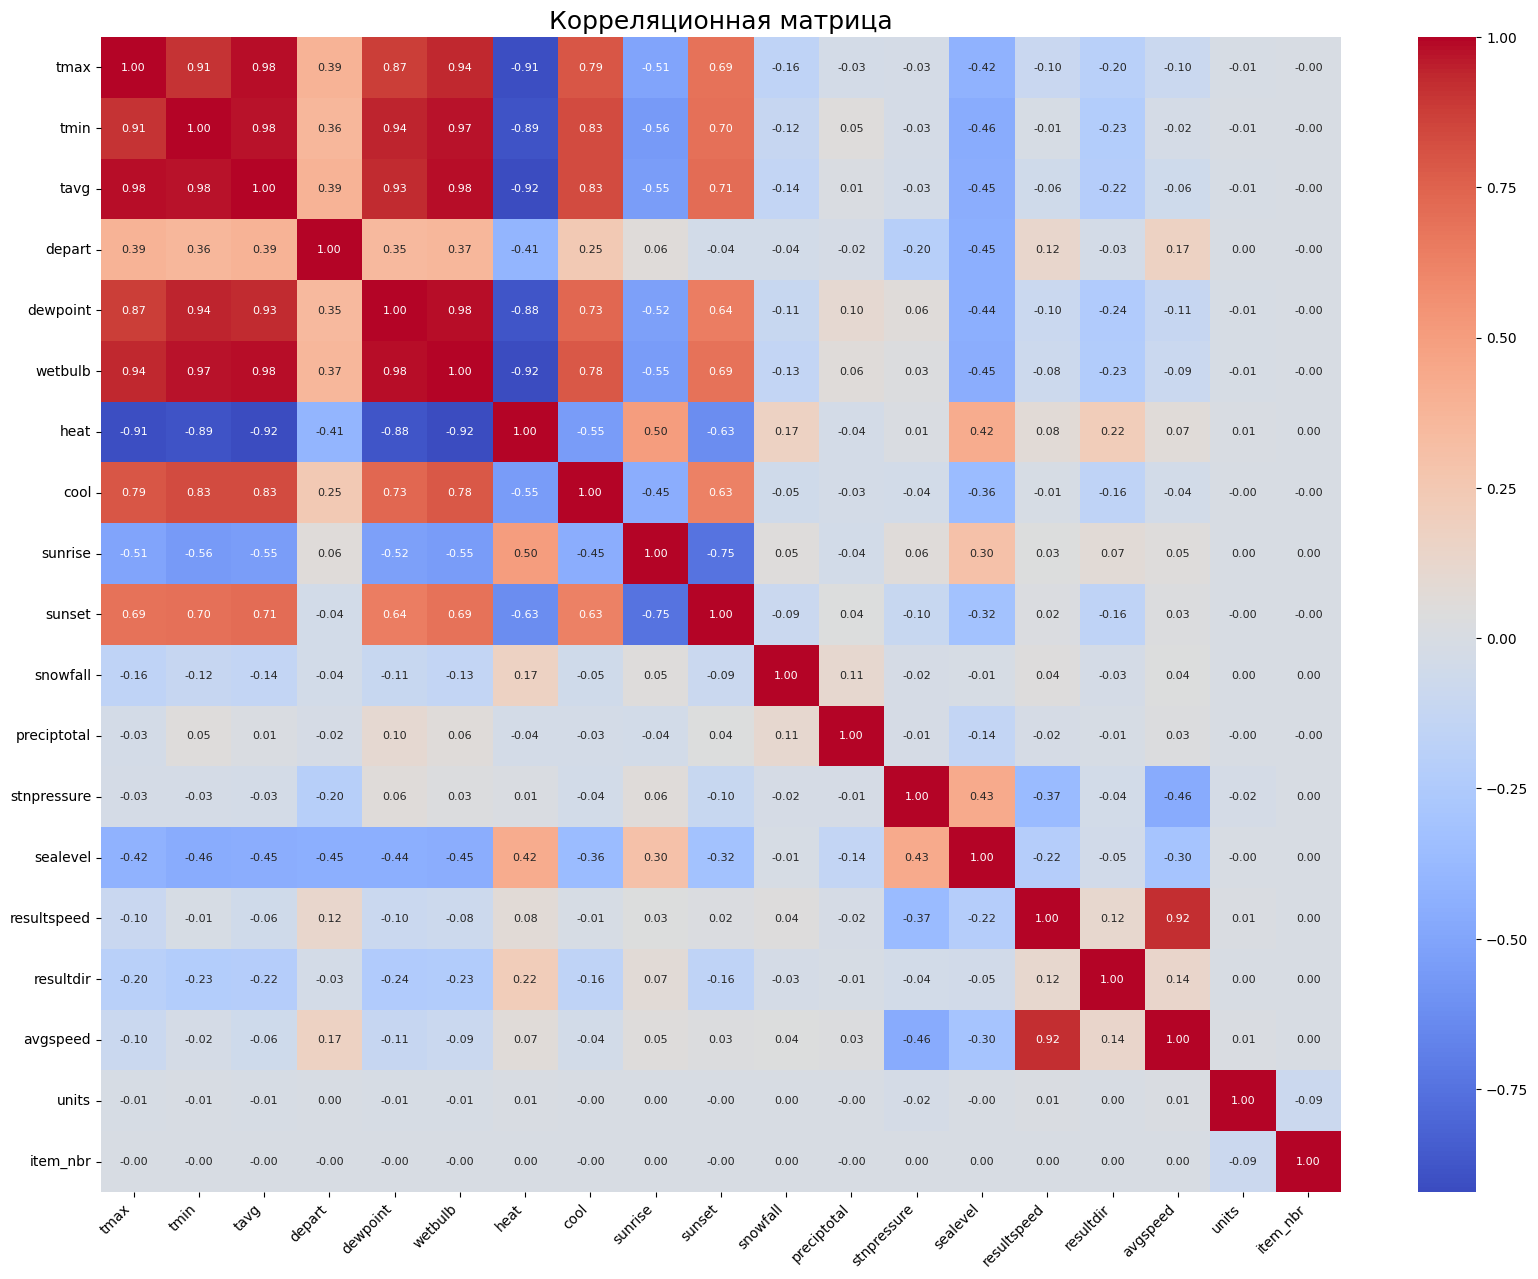

In [68]:
# Корреляционная матрица
print("\n=== Корреляционная матрица ===")


df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 15))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={"size":8}
)
plt.title('Корреляционная матрица', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


In [69]:
#Распределения признаков и целевой переменной
def plot_distributions(df, target_col=None):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Распределение: {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

    if target_col:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target_col], kde=True, bins=30)
        plt.title(f'Распределение целевой переменной: {target_col}')
        plt.xlabel(target_col)
        plt.ylabel('Частота')
        plt.show()

- На графиках распределения видно, что большинство признаков имеют **симметричное или скошенное** распределение.
- Возможны выбросы, но для этого сделаем отдельный анализ.
- Целевая переменная "units" распределена **неравномерно**.


In [70]:
#Анализ выбросов

def analyze_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.show()

        # Статистика выбросов по правилу 1.5 * IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'Кол-во выбросов в {col}: {outliers.shape[0]}')

- В данных обнаружены выбросы в некоторых числовых признаках.
- Их количество указано для каждого признака в выводе.
- Выбросы не обработы т.к данных мало.


In [71]:
#Анализ сбалансированности целевой переменной

def analyze_target_balance(df, target_col):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[target_col])
    plt.title(f'Сбалансированность целевой переменной: {target_col}')
    plt.ylabel('Количество')
    plt.show()

    print("\nБаланс классов (%):")
    print(df[target_col].value_counts(normalize=True) * 100)


=== Распределения признаков и целевой переменной ===


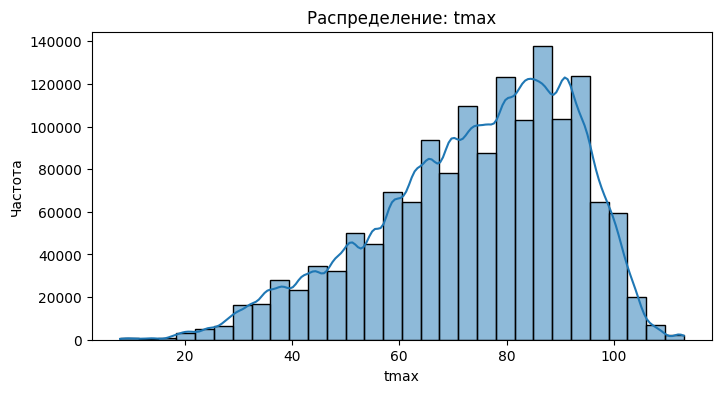

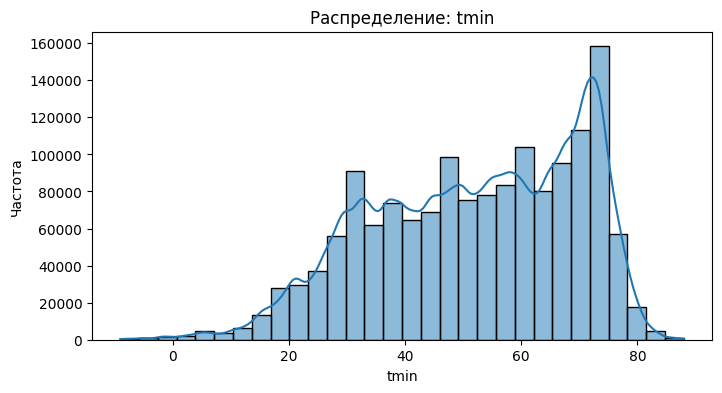

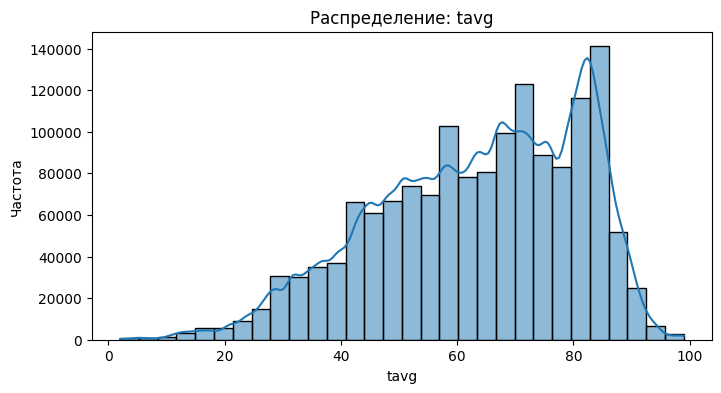

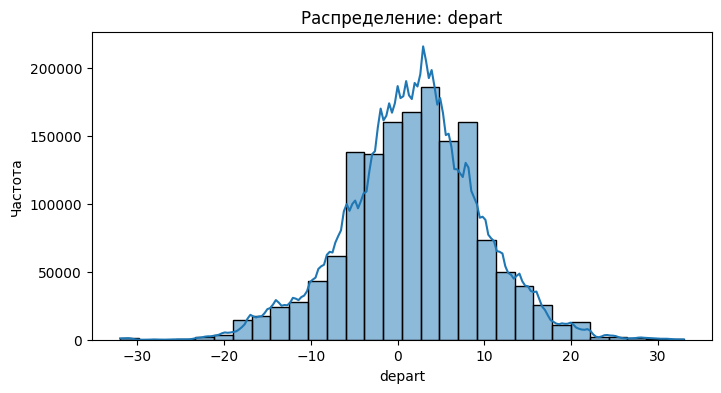

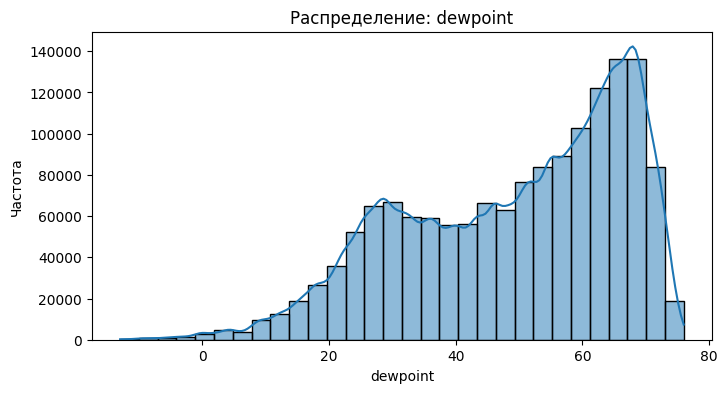

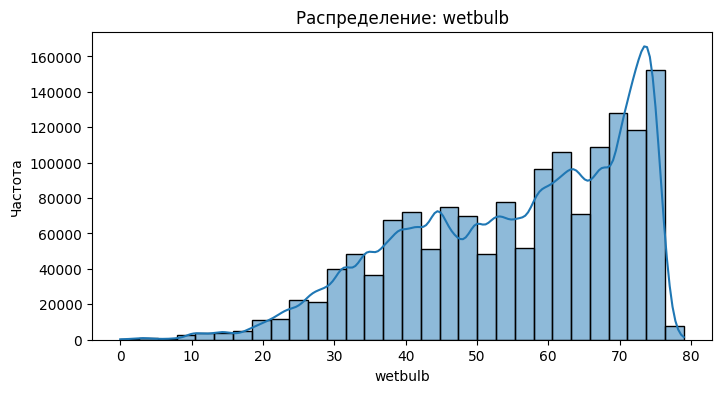

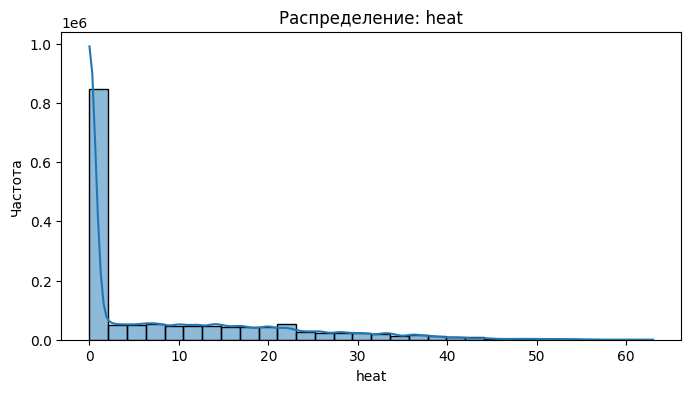

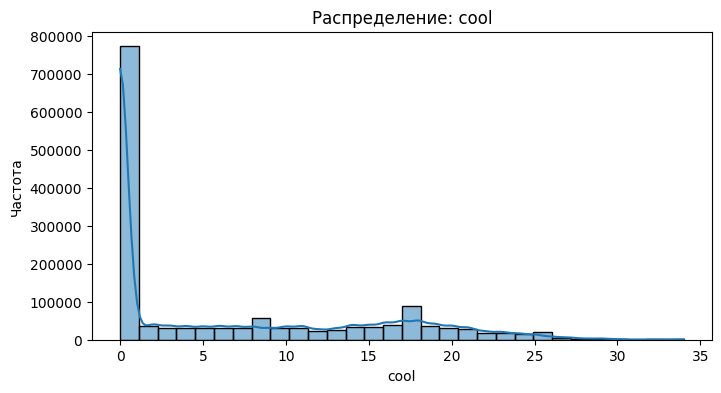

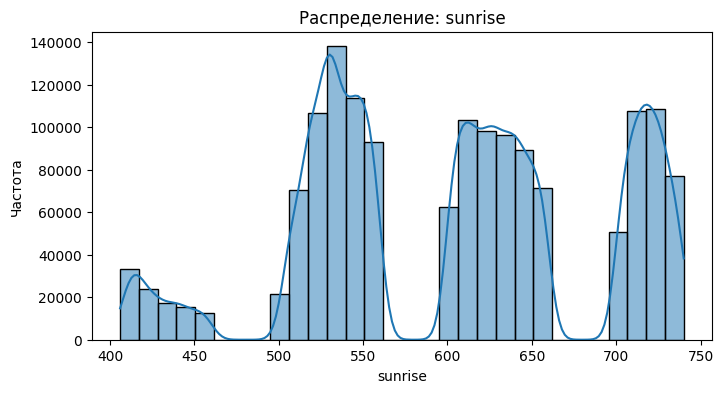

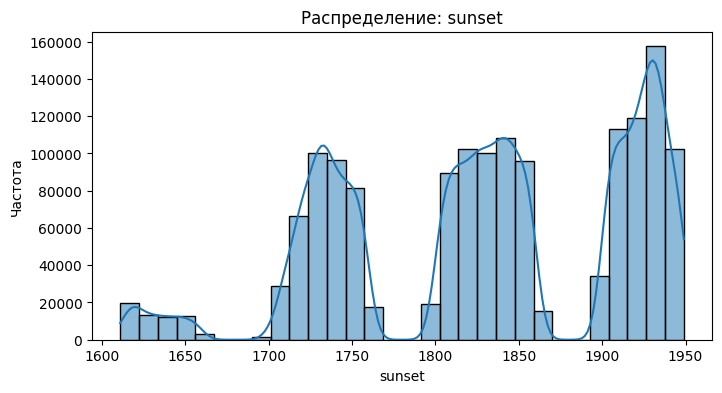

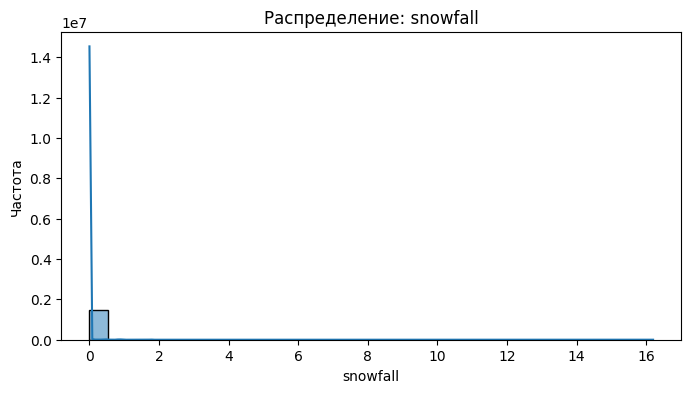

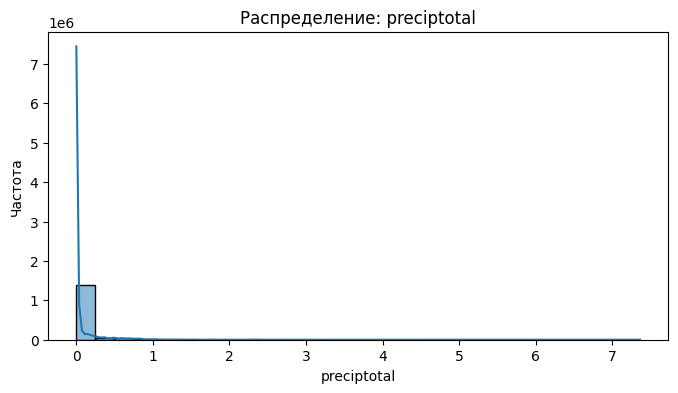

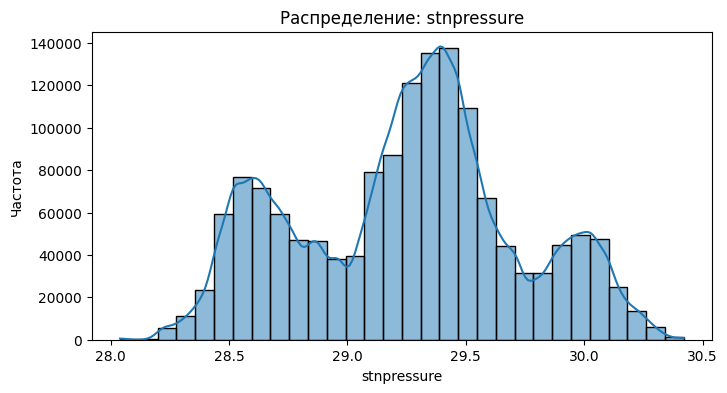

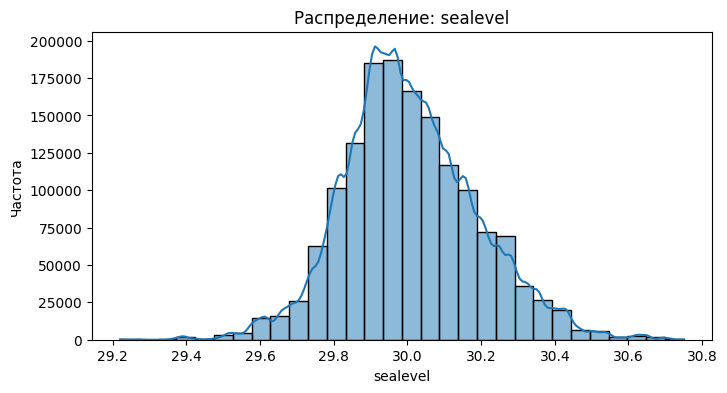

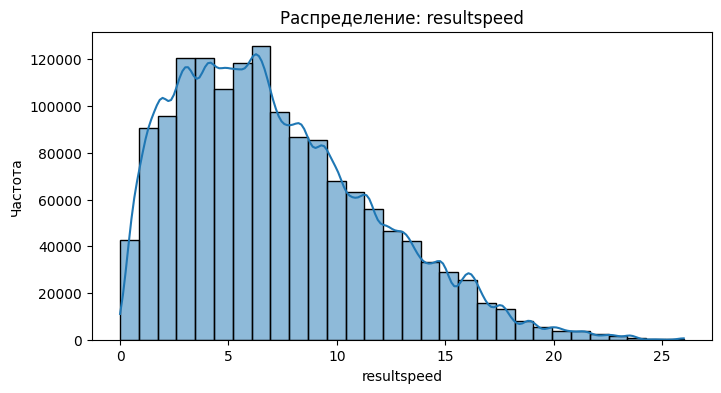

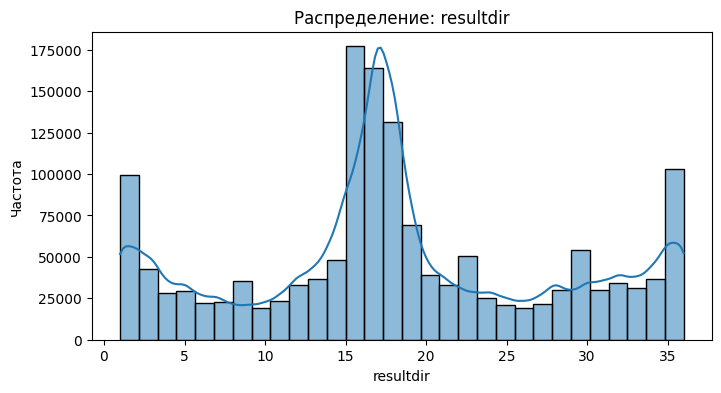

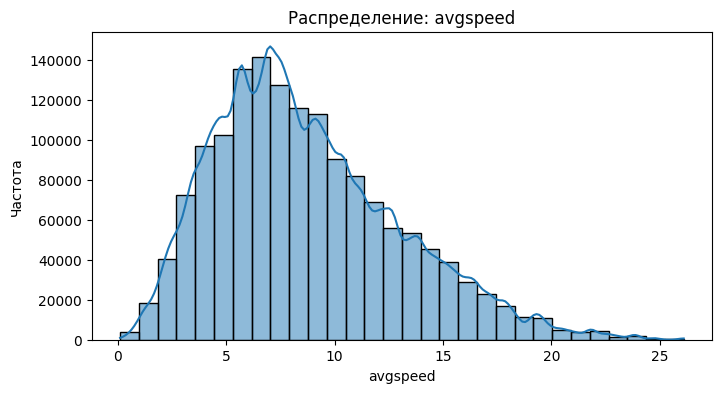

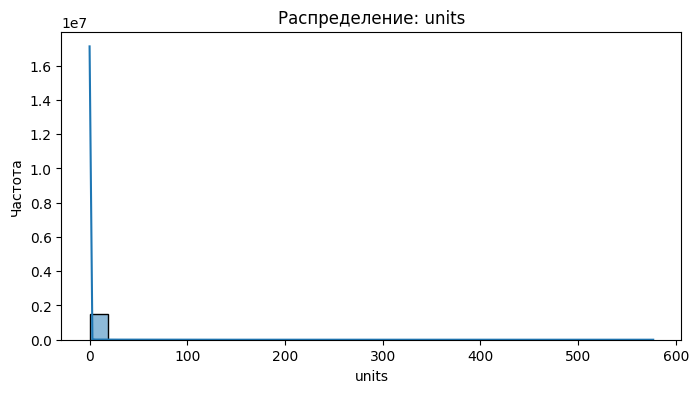

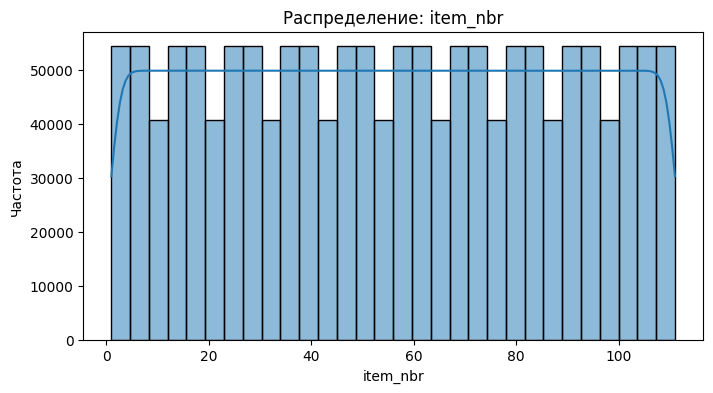

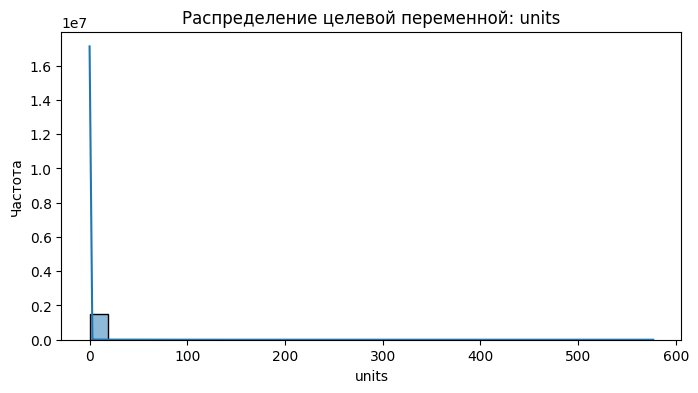


=== Анализ выбросов ===


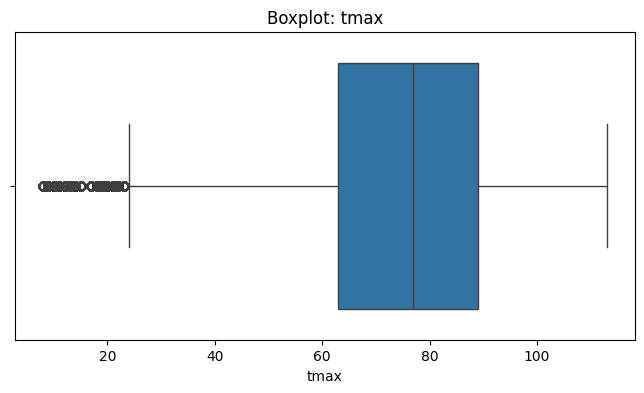

Кол-во выбросов в tmax: 6882


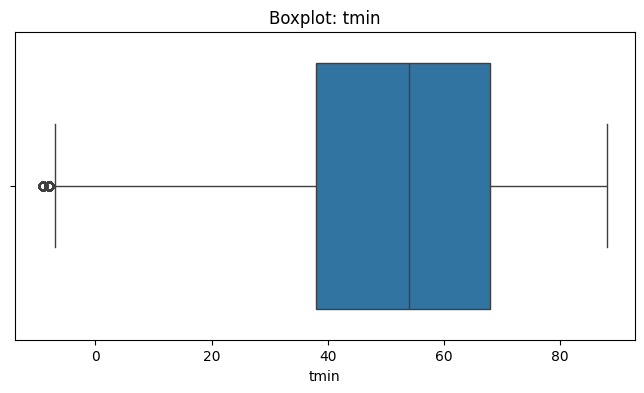

Кол-во выбросов в tmin: 333


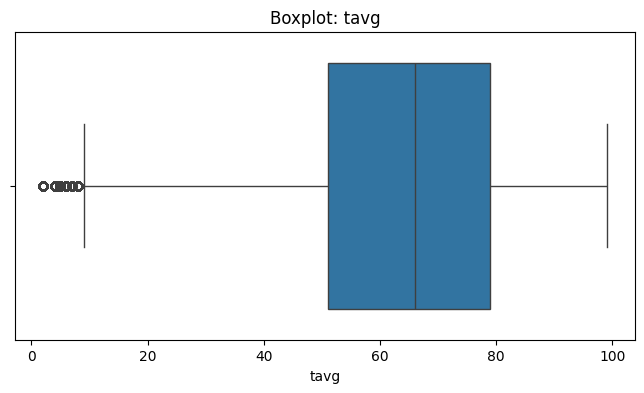

Кол-во выбросов в tavg: 1443


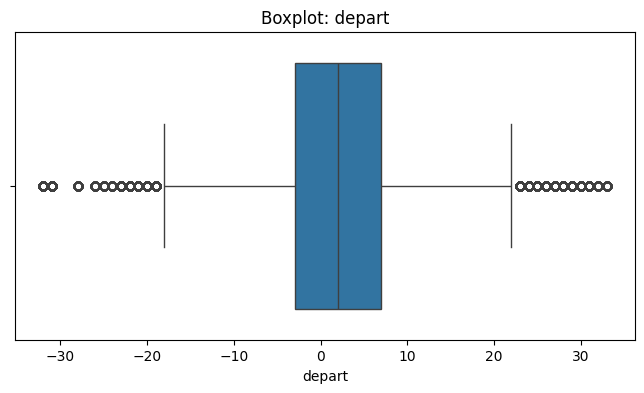

Кол-во выбросов в depart: 16095


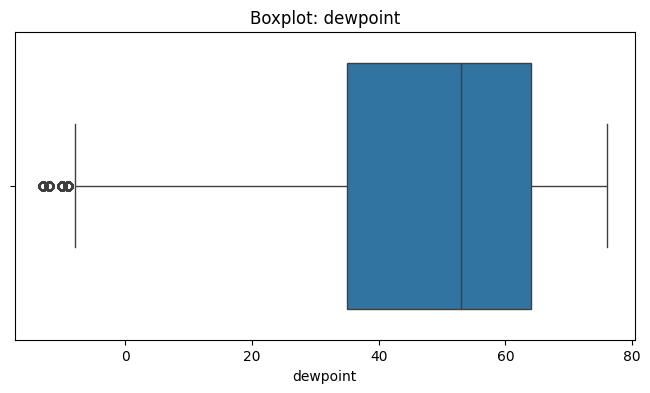

Кол-во выбросов в dewpoint: 777


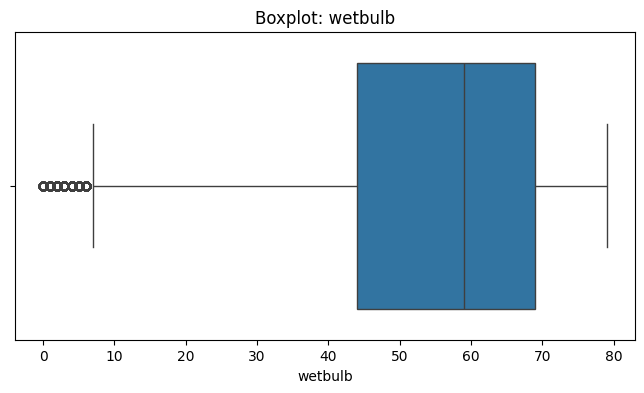

Кол-во выбросов в wetbulb: 1554


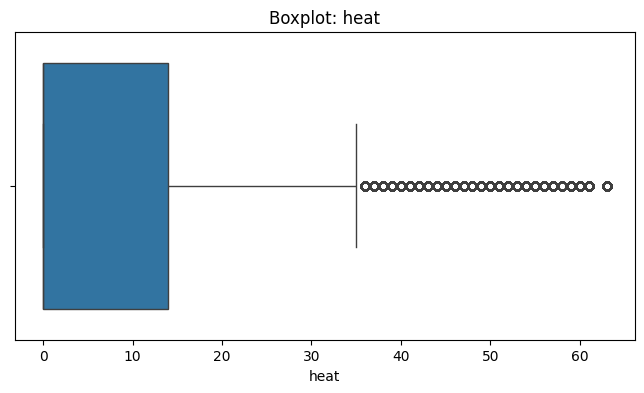

Кол-во выбросов в heat: 58053


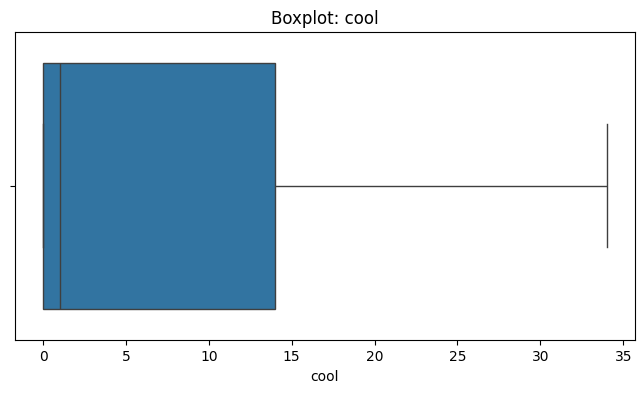

Кол-во выбросов в cool: 0


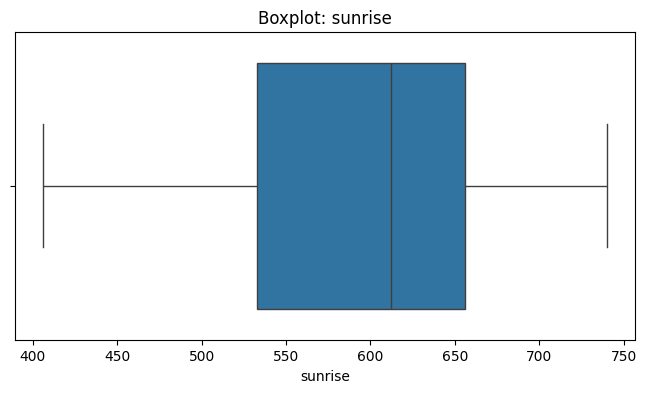

Кол-во выбросов в sunrise: 0


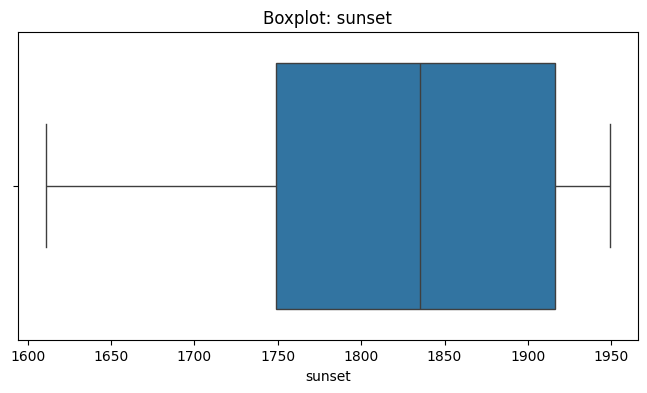

Кол-во выбросов в sunset: 0


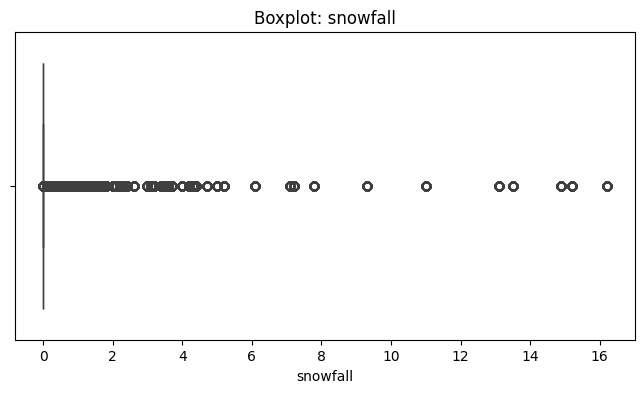

Кол-во выбросов в snowfall: 61161


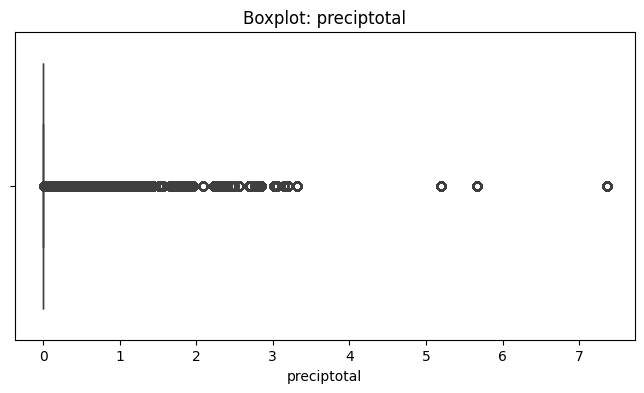

Кол-во выбросов в preciptotal: 339660


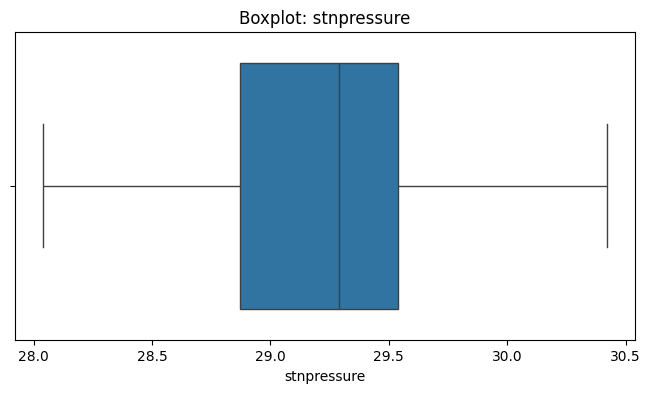

Кол-во выбросов в stnpressure: 0


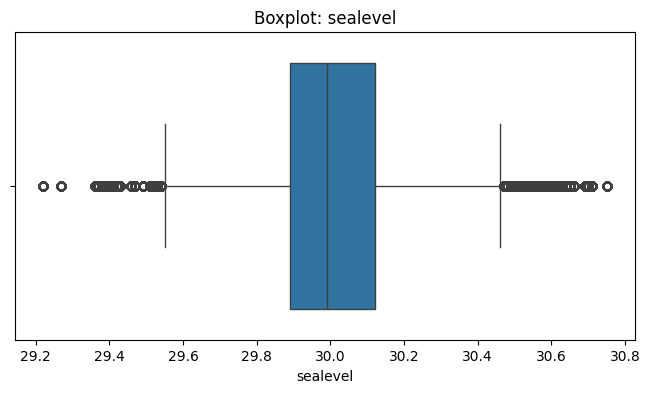

Кол-во выбросов в sealevel: 22977


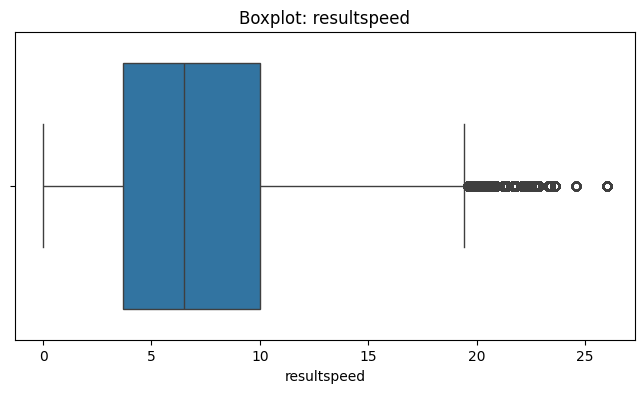

Кол-во выбросов в resultspeed: 15762


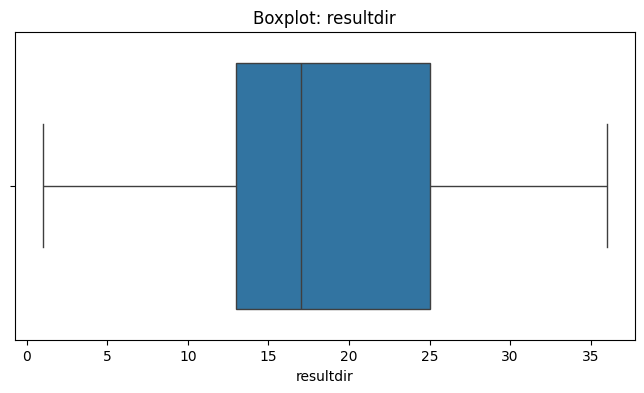

Кол-во выбросов в resultdir: 0


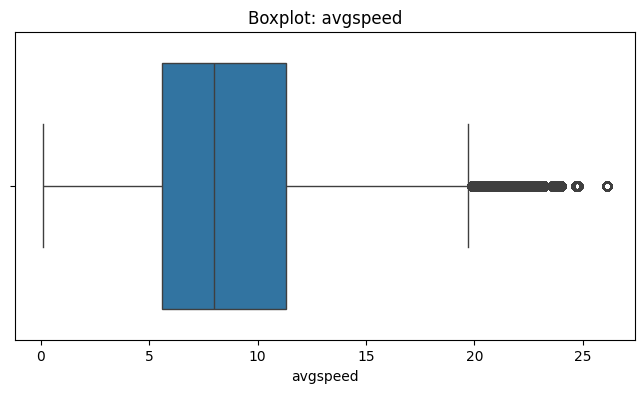

Кол-во выбросов в avgspeed: 19425


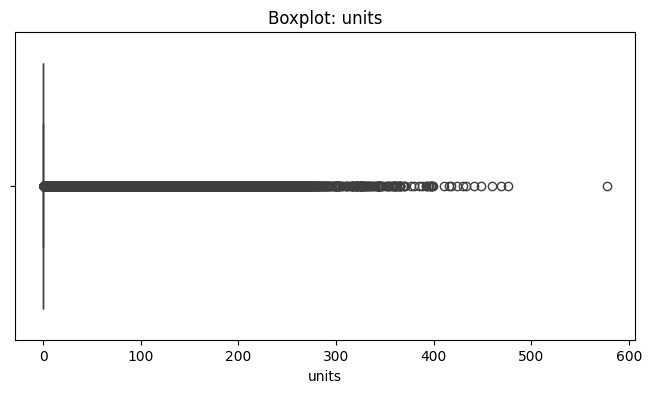

Кол-во выбросов в units: 37994


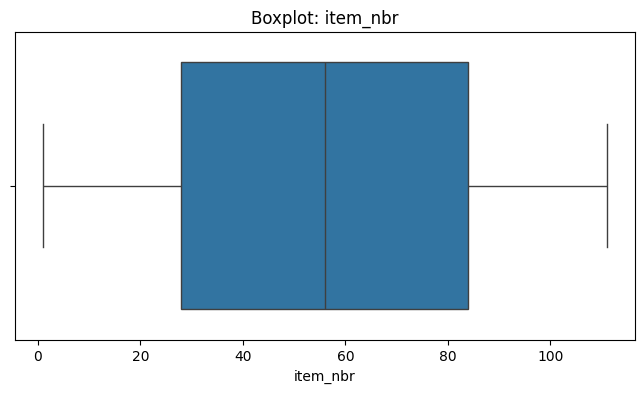

Кол-во выбросов в item_nbr: 0

=== Анализ сбалансированности целевой переменной ===


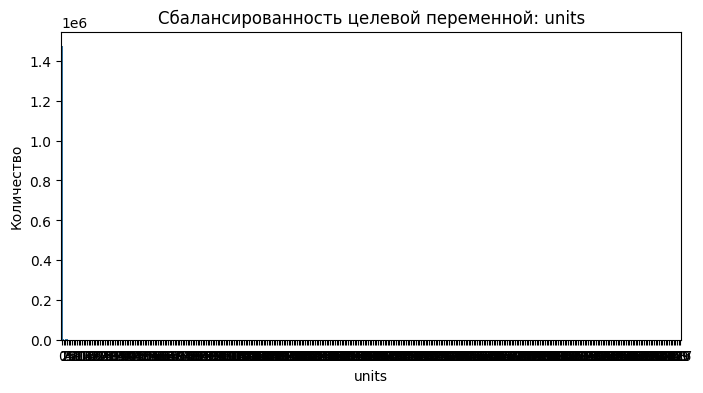


Баланс классов (%):
units
0      97.484654
1       0.266934
2       0.166635
3       0.080040
4       0.050580
         ...    
410     0.000066
337     0.000066
313     0.000066
312     0.000066
385     0.000066
Name: proportion, Length: 375, dtype: float64


In [72]:
#Запуск Анализа

target_column = 'units'

print("\n=== Распределения признаков и целевой переменной ===")
plot_distributions(df, target_col=target_column)

print("\n=== Анализ выбросов ===")
analyze_outliers(df)

print("\n=== Анализ сбалансированности целевой переменной ===")
analyze_target_balance(df, target_col=target_column)#

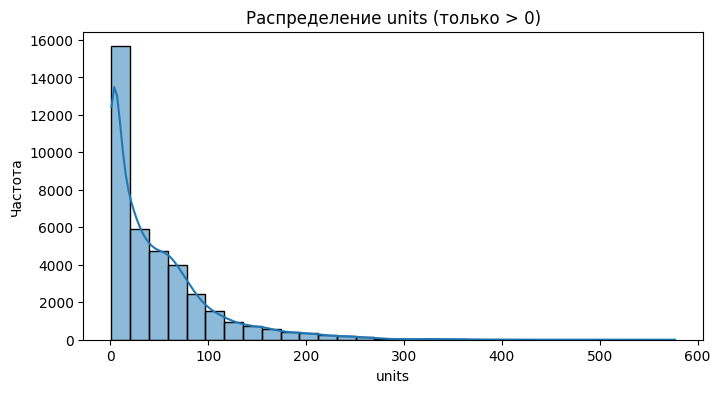

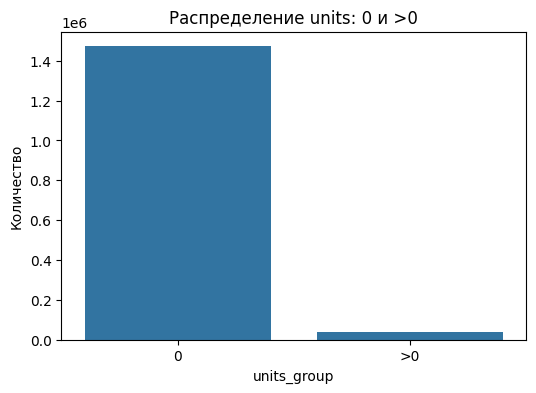


=== Статистика по целевой переменной ===
units_group
0     1472494
>0      37994
Name: count, dtype: int64

Проценты (%):
units_group
0     97.48
>0     2.52
Name: count, dtype: float64


In [73]:
# Анализ целевой переменной 'units' с разбиением на 0 и >0

def analyze_target_units(df, target_col='units'):
    # 1. Распределение значений > 0
    df_positive = df[df[target_col] > 0]

    plt.figure(figsize=(8, 4))
    sns.histplot(df_positive[target_col], kde=True, bins=30)
    plt.title(f'Распределение {target_col} (только > 0)')
    plt.xlabel(target_col)
    plt.ylabel('Частота')
    plt.show()

    # 2. Распределение: 0 и >0
    df['units_group'] = df[target_col].apply(lambda x: '0' if x == 0 else '>0')

    plt.figure(figsize=(6, 4))
    sns.countplot(x='units_group', data=df)
    plt.title(f'Распределение {target_col}: 0 и >0')
    plt.ylabel('Количество')
    plt.show()

    # 3. Вывод статистики
    counts = df['units_group'].value_counts()
    print("\n=== Статистика по целевой переменной ===")
    print(counts)
    print("\nПроценты (%):")
    print(round(counts / counts.sum() * 100, 2))

# Запуск функции
analyze_target_units(df, target_col='units')

In [74]:
#  Анализ категориальных признаков
if 'units_group' in df.columns:
    df = df.drop(columns='units_group')

def analyze_categorical_features(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        print(f"\n🔸 Признак: {col}")
        print(f"Уникальных значений: {df[col].nunique()}, {df[col].unique()}")

analyze_categorical_features(df)



🔸 Признак: city
Уникальных значений: 9, ['Los Angeles' 'Chicago' 'Dallas' 'Indianapolis' 'San Francisco'
 'Philadelphia' 'Seattle' 'Fort Worth' 'San Jose']


In [75]:
def plot_categorical_distributions(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        plt.figure(figsize=(8,4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Распределение категорий в признаке: {col}')
        plt.xlabel('Категории')
        plt.ylabel('Количество')
        plt.xticks(rotation=45)
        plt.show()


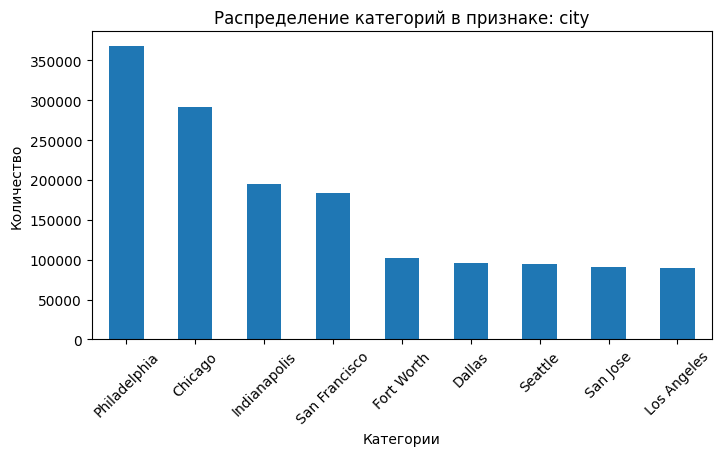

In [76]:
plot_categorical_distributions(df)

На графике представленны коды только с False, по этому они не информативны для обучения

In [77]:
target = 'units'

# Удаляем ненужные признаки
drop_cols = ['units_group', 'temp', 'city']
for col in drop_cols:
    if col in df.columns:
        df = df.drop(columns=col)

if target in df.columns:
    X = df.drop(columns=target)
    y = df[target]

    # Кодирование категориальных признаков
    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    # Обработка пропусков
    for col in X.columns:
        X[col] = X[col].fillna(X[col].mode()[0]) if X[col].dtype == 'object' or X[col].dtype.name == 'category' else X[col].fillna(X[col].median())

    # Обработка NaN в целевой переменной
    if y.isnull().sum() > 0:
        y = y.fillna(y.median())

    # Выбор модели
    if y.dtypes == 'object' or y.dtypes.name == 'category':
        y = LabelEncoder().fit_transform(y)
        model = RandomForestClassifier(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)

    # Обучение модели
    model.fit(X, y)
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    print("\n=== Важность признаков ===")
    display(feature_importance)
else:
    print("\nЦелевой признак 'units' не найден. Пропускаем анализ важности признаков.")


=== Важность признаков ===


,0
item_nbr,2.555938e-01
stnpressure,2.135928e-01
sunrise,1.008639e-01
sealevel,8.307404e-02
sunset,7.699076e-02
tmax,3.169215e-02
avgspeed,3.024735e-02
depart,2.887852e-02
dewpoint,2.869458e-02
resultspeed,2.796718e-02


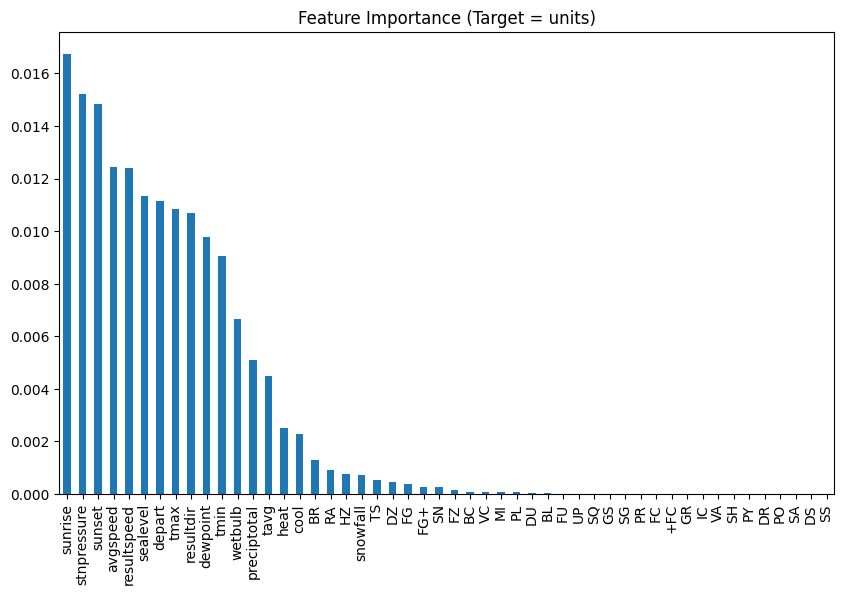

In [78]:
if 'feature_importance' in globals():
    plt.figure(figsize=(10,6))
    feature_importance_filtered.plot(kind='bar')
    plt.title('Feature Importance (Target = units)')
    plt.show()
